NAMA : SURYA FAJRI ALFITRA

NIM : 09011381823097

UJIAN AKHIR SEMESTER / KECERDASAN BUATAN

KELAS SK BUKIT

# Prediksi dengan menggunakan metode KNN

K-Nearest Neighbor atau KNN adalah salah satu algoritma yang digunakan untuk melakukan klasifikasi terhadap objek berdasarkan dari data pembelajaran (data training) yang jaraknya paling dekat dengan objek tersebut. Tujuan dari algoritma KNN adalah mengklasifikasikan objek baru berdasarkan atribut dan sampel-sampel dari data training.


# Import Library

In [166]:
# Importing required libraries.
#Memanggil pandas untuk manipulasi data
import pandas as pd

#Memanggil numpy untuk mengelolah data numerical
import numpy as np

#seaborn untuk memproduksi visualisasi dengan Python
import seaborn as sns

# Memanggil matplot untuk grafik
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

# Import Data & Menampilkan Data

Keterangan Class pada data

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (1=yes, 0=no)


In [167]:
# Memanggil data heart pada file csv
# Memasukkan ke dalam variabel df
df = pd.read_csv("heart.csv")

# Menampilkan 5 baris pertama pada data set
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [168]:
# Untuk melihat jumlah baris dan kolom
df.shape

(303, 14)

In [170]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(['target','thal','ca','exang','restecg','fbs','slope'], axis=1)

In [171]:
# Menampilkan kembali data set
df.head(5)

,age,sex,cp,trestbps,chol,thalach,oldpeak
0,63,1,3,145,233,150,2.3
1,37,1,2,130,250,187,3.5
2,41,0,1,130,204,172,1.4
3,56,1,1,120,236,178,0.8
4,57,0,0,120,354,163,0.6


# Exploratory Data Analysis

In [172]:
# Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.
df.describe()

,age,sex,cp,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,149.646865,1.039604
std,9.082101,0.466011,1.032052,17.538143,51.830751,22.905161,1.161075
min,29.000000,0.000000,0.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,202.000000,6.200000


### >Pair Plot

Pair Plot digunakan untuk melihat hubungan berpasangan antara semua variabel dalam dataset dan sumbu diagonal

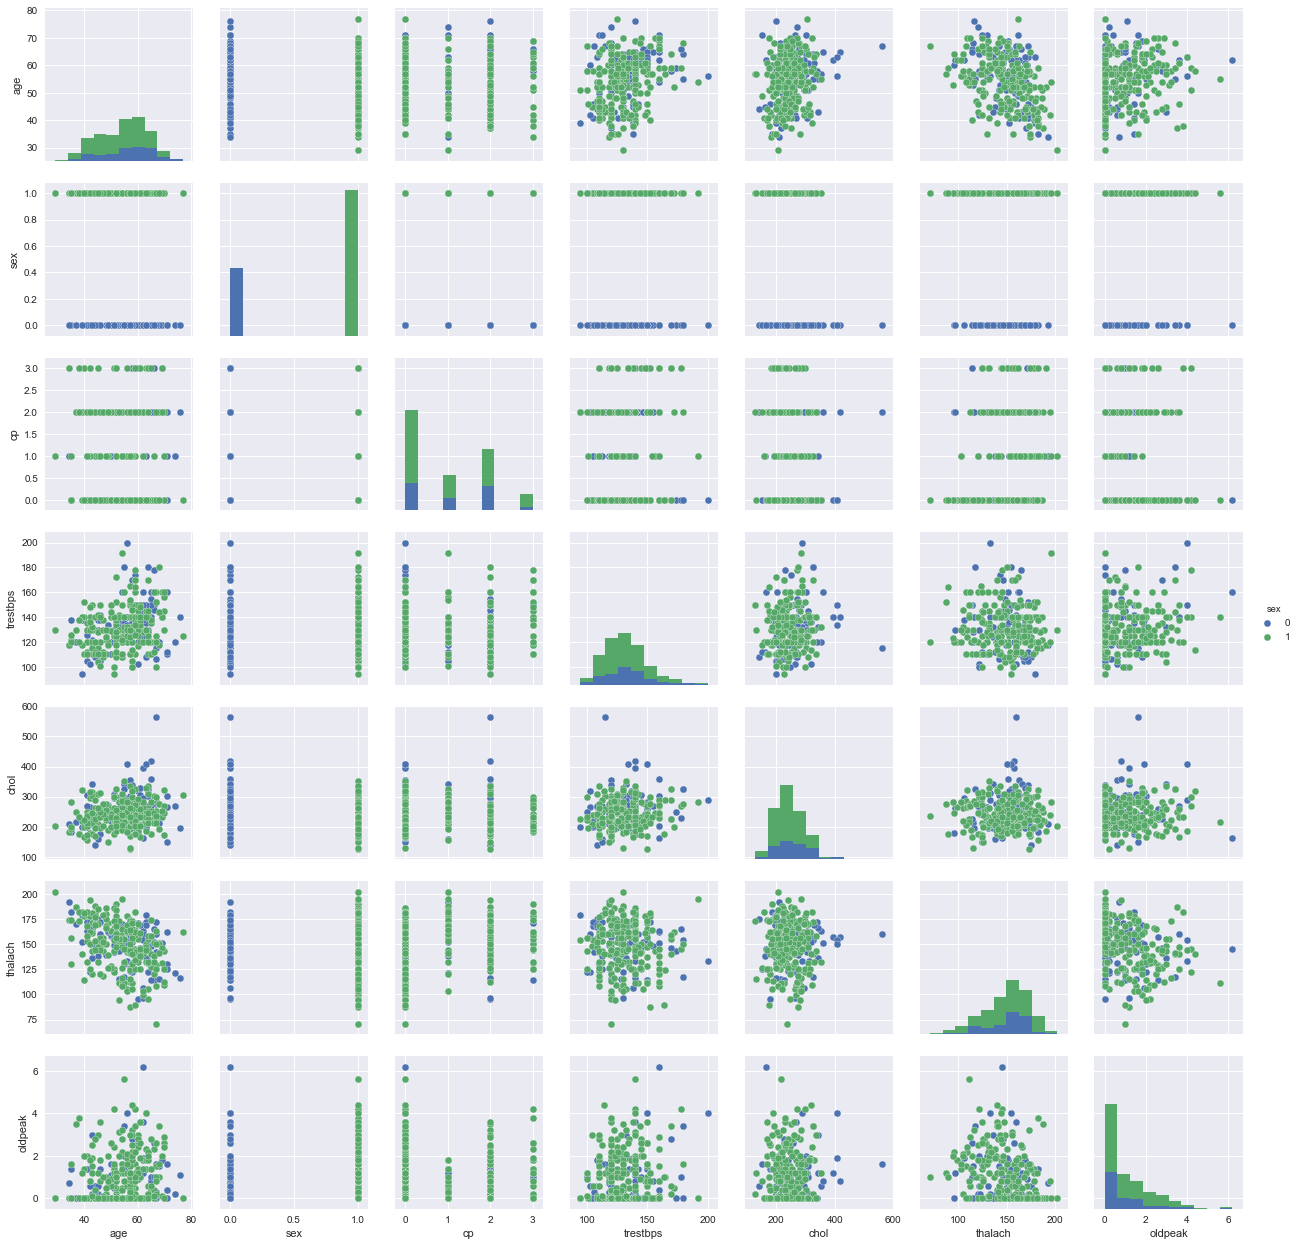

In [173]:
sns.pairplot(df, hue='sex')

# Processing

### > Memisahkan Features dan Label

Pada tahap ini akan melakukan operasi slicing untuk membagi data dari dalam objek DataFrame

In [230]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 3].values

### > Membagi Data Latih dan Uji

Pada tahap ini akan membagi data untuk latih dan uji. 


kita akan menggunakan fungsi train_test_split untuk memudahkan proses pembagian data agar data yang dibagi seimbang, untuk menghindari overfitting,kemudian dapat membagi dataset tadi menjadi data train dan test. 


Untuk data set ini akan membagi data tersebut menjadi 80% untuk training data data dan 20% untuk test data.

In [231]:
# Pada kasus ini kita menggunakan variabel 'trestbps','chol','thalach' sedangkan target variablenya adalah gender
x = df[['trestbps','chol','thalach']]
y = df['sex']


# kita akan mensplit menjadi 80% train data and 20% test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### > Hasil Setelah di Split

In [232]:
# Chek dimensi array dari massing masing variable
print('x_train = ', x_train.shape)
print('x_test = ', x_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

x_train =  (242, 3)
x_test =  (61, 3)
y_train =  (242,)
y_test =  (61,)


Dimensi x_train menjadi 242 baris dan 3 kolom, dimensi x_test menjadi 61 baris dan 3 kolom, dimensi x_train menjadi 242 baris dan, dimensi y_train menjadi 61 baris.

### > Label Encoding

Kita melabeli data training dengan kata-kata sehingga pemetaan dapat dilacak. Untuk mengonversi label kata menjadi angka, kita perlu menggunakan pembuat label encoding. label encoding mengacu pada proses transformasi label kata menjadi bentuk numerik.Jadi jika mereka sudah menjadi nomor, maka kita dapat menggunakannya secara langsung untuk memulai pelatihan

In [233]:
lb = LabelEncoder()
lb.fit(y_train)
 
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

### > Standarisasi

Beberapa bentuk normalisasi yang paling umum bertujuan untuk mengubah nilai-nilai sehingga jumlahnya menjadi 1 yang mana akan meningkatkan performa model KNN


In [234]:
scaler = StandardScaler()
scaler.fit(x_train)
 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### > Menentukan Nilai Konstanta k

KNN membutuhkan suatu nilai konstanta untuk menentukan berapa banyak tetangga yang akan digunakan oleh model. Kode di bawah ini akan melakukan training sebanyak 9 kali dengan nilai dari 1 hingga 9. Angka 9 ini bersifat bebas dan dapat diganti dengan angka lain.

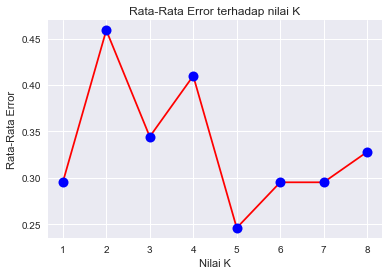

In [235]:
error = []
 
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
 
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
 
plt.figure()
plt.plot(range(1, 9), error, color='red', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Dari hasil grafik diatas,kita mendapat beberapa nilai yang dapat meminimalisir nilai error,yaitu K= 5,yang mana memiliki tingkat error sebesar sekitar 0,25.
Setelah mengetahui nilai dengan error yang rendah, maka kita dapat melatih kembali model dengan mengubah nilai sesuai dengan grafik yang ada.


### > Training

In [236]:
# import train_test_split merupakan sublibrary dari model selection
from sklearn.model_selection import train_test_split

# Memanggil library sk learn untuk KNN Clasifier 
from sklearn.neighbors import KNeighborsClassifier

In [237]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Evaluasi

Setelah proses training, maka akan mengevaluasi apakah model yang telah dibuat memiliki akurasi yang baik atau belum.

In [238]:
y_pred=knn.predict(x_test)

In [239]:
print("Accuracy :" ,knn.score(x_test,y_test))

Accuracy : 0.7540983606557377


In [240]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  9]
 [ 6 38]]
              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.81      0.86      0.84        44

    accuracy                           0.75        61
   macro avg       0.69      0.67      0.68        61
weighted avg       0.74      0.75      0.75        61



Berdasarkan hasil output dari classification_report, diketahui bahwa model masih terdapat kesalahan klasifikasi yang ditandai dengan precision dan recall yang tidak mencapai angka 1.

# Kesimpulan

Model prediksi ini memiliki performa sebesar 75% merupakan nilai yang cukup besar dan menandakan keakuratan prediksi bisa dikatakan cukup baik.
